In [2]:
%load_ext autoreload
%autoreload 2

import os
import cv2
import matplotlib.pyplot as plt
from attention.img_proc.img_process import *
from attention.img_proc.img_split import *
from attention.models.face_models import *
from attention.utils.img_plot import *
from attention.utils.utilities import *
import copy

objc[16818]: Class CaptureDelegate is implemented in both /Users/noah/.pyenv/versions/3.10.6/envs/attention-env/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x13d5824e8) and /Users/noah/.pyenv/versions/3.10.6/envs/attention-env/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x12d37c860). One of the two will be used. Which one is undefined.
objc[16818]: Class CVWindow is implemented in both /Users/noah/.pyenv/versions/3.10.6/envs/attention-env/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x13d582538) and /Users/noah/.pyenv/versions/3.10.6/envs/attention-env/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x10e7a0a68). One of the two will be used. Which one is undefined.
objc[16818]: Class CVView is implemented in both /Users/noah/.pyenv/versions/3.10.6/envs/attention-env/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x13d582560) and /Users/noah/.pyenv/versions/3.10.6/envs/attention-env/lib/python3.10/site-packages/mediapip

## DETECT FACES ON GROUP IMAGE (splittmng image for better detection)

### Loading image

In [3]:
image_name = "IMG_3288 2 copy.jpg"
image_path = os.path.join(os.path.expanduser('~'), "Desktop", "IMG_3288 2 copy.jpg")

In [4]:
image = cv2_process(image_path)
# plt.imshow(image)

[ WARN:0@1.224] global loadsave.cpp:244 findDecoder imread_('/Users/noah/Desktop/IMG_3288 2 copy.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


### Splitting in multiple crops

#### Defining number of crops along the axes

In [30]:
n_split_w = 12
n_split_h = 12

#### Cropping the image


In [31]:
crops = split_image(image, n_split_w, n_split_h, 0.02, 0.02)
# show_crops(crops)

### Generating bboxes and processing them 

#### Listing the bbox coordinates in the crops

In [32]:
# as per the crop coordinate system and the absolute coordinate system
bbox_crop_list = []
bbox_crop_list_absolute = []
for crop in crops:
    coord_set = detect_face(crop.image)
    bbox_crop_list.append(coord_set)
    coord_set_absolute = reconstruct_coord(crop, coord_set)
    bbox_crop_list_absolute.append(coord_set_absolute)
bbox_crop_list_absolute

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'x1': 776, 'x2': 899, 'y1': 1480, 'y2': 1613}],
 [{'x1': 1301, 'x2': 1404, 'y1': 1476, 'y2': 1569}],
 [{'x1': 1317, 'x2': 1388, 'y1': 1476, 'y2': 1571}],
 [],
 [],
 [],
 [],
 [{'x1': 3129, 'x2': 3253, 'y1': 1402, 'y2': 1529}],
 [],
 [],
 [],
 [],
 [{'x1': 776, 'x2': 900, 'y1': 1494, 'y2': 1602}],
 [{'x1': 1301, 'x2': 1403, 'y1': 1491, 'y2': 1557}],
 [{'x1': 1315, 'x2': 1388, 'y1': 1488, 'y2': 1559}],
 [],
 [],
 [{'x1': 2645, 'x2': 2728, 'y1': 1552, 'y2': 1605}],
 [{'x1': 2886, 'x2': 2948, 'y1': 1475, 'y2': 1508}],
 [],
 [{'x1': 3483, 'x2': 3622, 'y1': 1527, 'y2': 1652}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],

#### Drawing the bbox on each crop 


In [33]:
crops_annotated = []
for i in range(len(crops)):
    crop_annotated = copy.copy(crops[i])
    crop_annotated.image = output_image_bboxes(crop_annotated.image, bbox_crop_list[i])
    crops_annotated.append(crop_annotated)
# show_crops(crops_annotated)

#### Eliminating duplicate bboxes

In [34]:
bbox_list = bbox_merge(bbox_crop_list_absolute)
bbox_list

[{'x1': 776, 'x2': 899, 'y1': 1480, 'y2': 1613},
 {'x1': 1301, 'x2': 1404, 'y1': 1476, 'y2': 1569},
 {'x1': 3129, 'x2': 3253, 'y1': 1402, 'y2': 1529},
 {'x1': 2645, 'x2': 2728, 'y1': 1552, 'y2': 1605},
 {'x1': 2886, 'x2': 2948, 'y1': 1475, 'y2': 1508},
 {'x1': 3483, 'x2': 3622, 'y1': 1527, 'y2': 1652}]

## Generating final image output

#### Drawing the unique bboxes on the original image 

In [1]:
image_output = output_image_bboxes(image, bbox_list)
plt.imshow(image_output)

NameError: name 'output_image_bboxes' is not defined

### Saving the image output

In [36]:
image_output_rgb = cv2.cvtColor(image_output, cv2.COLOR_RGB2BGR)
output_path = os.path.join(os.path.expanduser('~'), "Desktop", "output")

cv2.imwrite(os.path.join(output_path, image_name), image_output_rgb)

True

# DETECTING EYES AND IRIS ON FACES

### Generating faces

In [37]:
faces = crop_faces(image, bbox_list)
face = faces[1]
# plt.imshow(face)

### Generating eye and iris landmarks for one face

#### Running face mesh model on the face

In [38]:
mp_landmarks = find_landmarks(face)

#### Drawing the face mesh on the face

In [39]:
face_annotated = output_face_landmarks(face, mp_landmarks)
# plt.imshow(face_annotated)

#### Converting the Mediapipe landmark to a standard system of coordinates

In [40]:
landmark_list = convert_landmarks(face, mp_landmarks)
landmark_list

[(52, 55),
 (51, 41),
 (51, 47),
 (48, 35),
 (51, 38),
 (51, 36),
 (51, 31),
 (30, 35),
 (50, 26),
 (50, 22),
 (50, 12),
 (52, 56),
 (52, 57),
 (52, 57),
 (52, 58),
 (52, 58),
 (52, 59),
 (52, 61),
 (52, 65),
 (51, 43),
 (49, 44),
 (17, 30),
 (38, 36),
 (36, 37),
 (33, 37),
 (29, 36),
 (41, 35),
 (34, 28),
 (37, 28),
 (31, 29),
 (29, 31),
 (26, 38),
 (40, 72),
 (29, 35),
 (16, 41),
 (22, 37),
 (36, 45),
 (48, 54),
 (49, 57),
 (45, 56),
 (42, 58),
 (46, 58),
 (44, 59),
 (38, 63),
 (49, 41),
 (48, 39),
 (24, 28),
 (42, 39),
 (42, 44),
 (41, 43),
 (27, 47),
 (48, 36),
 (32, 23),
 (27, 25),
 (20, 23),
 (45, 25),
 (40, 29),
 (35, 61),
 (19, 70),
 (44, 45),
 (47, 46),
 (40, 61),
 (40, 61),
 (25, 23),
 (42, 46),
 (38, 23),
 (37, 21),
 (33, 14),
 (23, 24),
 (35, 18),
 (21, 27),
 (19, 29),
 (49, 56),
 (45, 57),
 (43, 58),
 (45, 46),
 (40, 61),
 (41, 61),
 (41, 61),
 (46, 43),
 (44, 59),
 (46, 58),
 (49, 58),
 (48, 65),
 (48, 61),
 (49, 60),
 (49, 59),
 (49, 58),
 (44, 59),
 (43, 60),
 (43, 60),

#### Defining the landmarks we want to focus on

In [41]:
# GLOBAL PARAMS: LANDMARK INDICES
LEFT_EYE_EDGES =[362, 263]
RIGHT_EYE_EDGES =[33, 133]

LEFT_IRIS_CONTOUR = [474, 475, 476, 477]
RIGHT_IRIS_CONTOUR = [469, 470, 471, 472]

LEFT_IRIS_CENTER = [473]
RIGHT_IRIS_CENTER = [468]

In [42]:
# Indices of the landmarks we focus on
landmark_idx = LEFT_EYE_EDGES  + LEFT_IRIS_CENTER + RIGHT_EYE_EDGES + RIGHT_IRIS_CENTER

In [43]:
# Extracting the coordinates of the landmarks we focus on
landmark_focus_x = [landmark_list[idx] for idx in landmark_idx]
landmark_focus_x

[(59, 33), (72, 34), (66, 33), (29, 35), (42, 33), (36, 34)]

### Generating final image output

#### Drawing the points on the face image

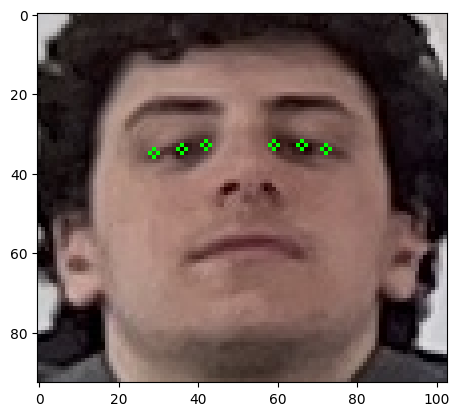

In [44]:
face_spec_lm = output_specific_landmarks(face, landmark_list, landmark_idx)
plt.imshow(face_spec_lm)

### Saving the face image output

In [45]:
face_output_rgb = cv2.cvtColor(face_spec_lm, cv2.COLOR_RGB2BGR)
output_path = os.path.join(os.path.expanduser('~'), "Desktop", "output")
face_name = 'noah_lm.jpg'

cv2.imwrite(os.path.join(output_path, face_name), face_output_rgb)

True